psudocode for the linear regression algorithm
- input: a dataset of points
- output: a line that best fits/closest to the points
- procedure
  - pick a random line
  - repeat many times
    - pick a random point
    - move the line closer to the point
  - return the line obtained 

put it mathematically via prediction model: $\hat{p}=ax+b$ where a is the weight and b is the intercept.


pseudocode for the linear regression algorithm
- input: a dataset of points
- output: a line that best fits the points
- procedure
  - pick a model with random weights and a random bias
  - repeat many times
    - pick a random point
    - slightly adjust the weights and bias to improve the prediction for that point
  - return the model obtained





how much should I adjust the weights? How many times should I repeat the algorithm? How do I know when I'm done? How do I know this algorithm works?

pseudocode for adjusting the line (simple trick)
- input
  - a line with slode m , y-intercept b, and a model $\hat{p}=mx+b$
  - a point with coordinates (r,p)
- output: a line with equation $\hat{p}=m'r+b'$ that is closer to the point
- procedure
  - pick two small numbers $\eta_1, \eta_2$
  - case 1: if the ponit is above the line and to the right of the y-axis, we rotate the line counterclockwise and translate it upward by 
    - add $\eta_1$ to the slope m. obtain $m'=m+\eta_1$
    - add $\eta_2$ to the y-intercept b. obtain $b'=b+\eta_2$
  - case 2: if the point is below the line and to the right of the y-axis, we rotate the line clockwise and translate it downward by
    - subtract $\eta_1$ from the slope m. obtain $m'=m-\eta_1$
    - subtract $\eta_2$ from the y-intercept b. obtain $b'=b-\eta_2$
  - case 3: if the point is above the line and to the left of the y-axis, we rotate the line clockwise and translate it upward by
    - subtract $\eta_1$ from the slope m. obtain $m'=m-\eta_1$
    - add $\eta_2$ to the y-intercept b. obtain $b'=b+\eta_2$
  - case 4: if the point is below the line and to the left of the y-axis, we rotate the line counterclockwise and translate it downward by
    - add $\eta_1$ to the slope m. obtain $m'=m+\eta_1$
    - subtract $\eta_2$ from the y-intercept b. obtain $b'=b-\eta_2$
  - return the line with equation $\hat{p}=m'r+b'$



In [6]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

learning rate: $\eta_1$ and $\eta_2$ are called the learning rates. They are small numbers picked before training the model that determine how much the prediction line should be adjusted. If the learning rates are too large, the line may oscillate and never converge to a good solution. If the learning rates are too small, the line may take too long to converge.

pseudocode for the square trick

- inputs
  - a line with slope m and y-intercept b, and equation $\hat{p}=mx+b$ 
  - a point with coordinates (r,p)
  - a small positive value $\eta$ (the learning rate)
- output
  - a line with equation $\hat{p}=m'r+b'$ that is closer to the point
- procedure
  - add $\eta r(p-\hat{p})$ to the slope m. obtain $m'=m+\eta r(p-\hat{p})$ (rotation)
  - add $\eta(p-\hat{p})$ to the y-intercept b. obtain $b'=b+\eta(p-\hat{p})$ (translation)
- return the line with equation $\hat{p}=m'r+b'$



In [14]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

pseudocode for the absolute trick

- inputs
  - a line with slope m and y-intercept b, and equation $\hat{p}=mx+b$ 
  - a point with coordinates (r,p)
  - a small positive value $\eta$ (the learning rate)
- output
  - a line with equation $\hat{p}=m'r+b'$ that is closer to the point
- procedure
  - case 1: if the point is above the line ($p>\hat{p}$)
    - add $\eta r$  to the slope m. obtain $m'=m+\eta r$ (rotation)
    - add $\eta$ to the y-intercept b. obtain $b'=b+\eta$ (translation up)
  - case 2: if the point is below the line ($p<\hat{p}$)
    - subtract $\eta r$ from the slope m. obtain $m'=m-\eta r$ (rotation)
    - subtract $\eta$ from the y-intercept b. obtain $b'=b-\eta$ (translation down)
  - return the line with equation $\hat{p}=m'r+b'$



In [15]:
def absolute_trick(base_price, price_per_room, num_rooms, 
                   price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

the linear regression algorithm: repeats the absolute or square trick until the line is close enough to the data points.

pseudocode for the linear regression algorithm

- inputs
  - a dataset of houses with number of rooms and prices
- outputs
  - model weights: price per room and base price
- procedure
  - initialize the price per room and base price to small random numbers
  - repeat many times
    - pick a random data point
    - update the slope and the y-intercept using the absolute or square trick


In [25]:
import random
import utils
import matplotlib.pyplot as plt

def plot_with_line(features, labels, slope, intercept):
    plt.scatter(features, labels, color='blue', label='Data Points')
    x = [min(features), max(features)]
    y = [slope * min(features) + intercept, slope * max(features) + intercept]
    plt.plot(x, y, color='black', label='Regression Line')
    plt.xlabel('Number of Rooms')
    plt.ylabel('Price')
    plt.title('Price vs. Number of Rooms with Regression Line')
    plt.legend()
    plt.show()


def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price, price_per_room,
                                                  num_rooms, price, learning_rate=learning_rate)
    # draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    # plot_points(features, labels)
    plot_with_line(features, labels, price_per_room, base_price)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

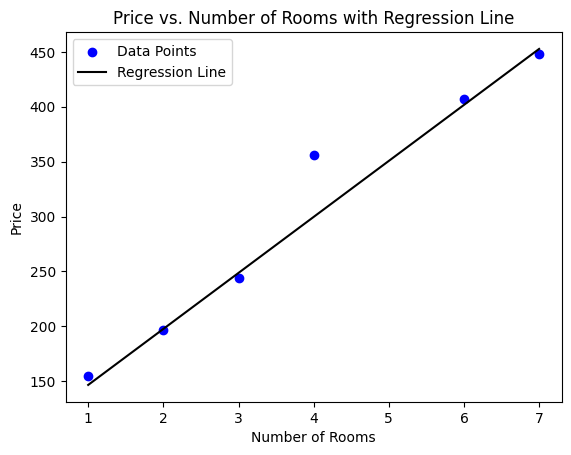

Price per room: 51.00819323587654
Base price: 95.58785015866812


(np.float64(51.00819323587654), np.float64(95.58785015866812))

In [26]:
# load data and plot it
import numpy as np
features = np.array([1,2,3,4,6,7])
labels = np.array([155,197,244,356,407,448])

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

- how good the model is? **mean absolute error** vs. **mean squared error**. 
  - mean absolute error (**MAE**): the average of the absolute differences between the predicted and actual values
  - mean squared error (**MSE**): the average of the squared differences between the predicted and actual values
    - root mean square error (**RMSE**): match unit of the data
- how to decrease MAE/MSE? **gradient descent**. 
  - start with any line
  - find the best direction to move our line, using either the absolute or the square trick
  - move the line a little bit in that direction
  - repeat step 2 and 3 many times
- gradient descent
  - stochastic gradient descent (**SGD**): pick a random data point and use it to update the line
  - mini-batch gradient descent (**MBGD**): pick a few data points and use them to update the line
  - batch gradient descent (**BGD**): pick all data points and use them to update the line

In [27]:
def rmse(labels, predictions):
    n = len(labels)
    diff = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(diff, diff))) # root of MSE

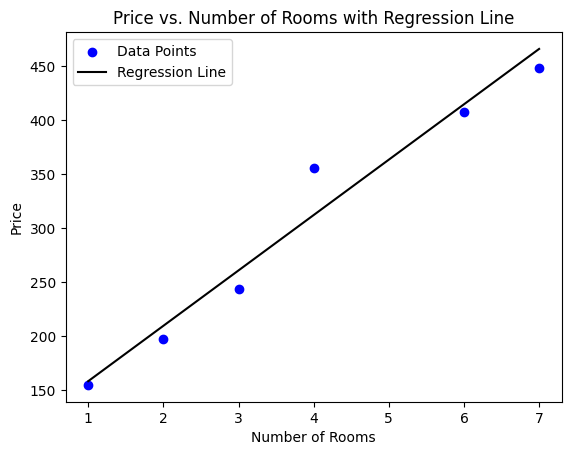

Price per room: 51.19686298422263
Base price: 107.2501839822183


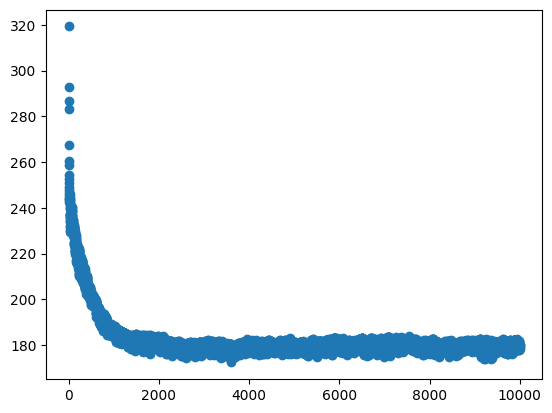

(np.float64(51.19686298422263), np.float64(107.2501839822183))

In [28]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    plot_with_line(features, labels, price_per_room, base_price)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

application: use linear regression algorithm on housing prices in Hyderabad, India.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

data = pd.read_csv('./Hyderabad.csv')
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


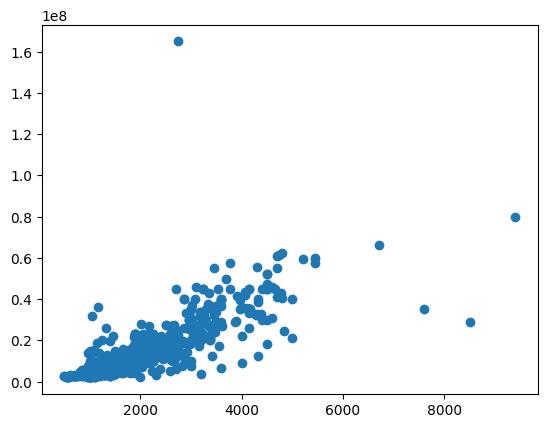

In [34]:
plt.scatter(data['Area'], data['Price'])
plt.show()

In [35]:
import statsmodels.api as sm

exog = sm.add_constant(data['Area']) # adds an intercept column
model_linear_regression = sm.OLS(
    endog = data['Price'],
    exog = exog)
results_regression = model_linear_regression.fit()
results_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     5542.
Date:                Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:24:22   Log-Likelihood:                -42364.
No. Observations:                2518   AIC:                         8.473e+04
Df Residuals:                    2516   BIC:                         8.474e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.223e+06   2.37e+05    -26.298      0.000   -6.69e+06   -5.76e+06
Area        9753.9406    131.026     74.443      0.000    9497.012       1e+04
==============================================================================
Omnibus:                     4164.869   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9856160.923
Skew:                          10.294   Prob(JB):                         0.00
Kurtosis:                     308.809   Cond. No.                     4.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

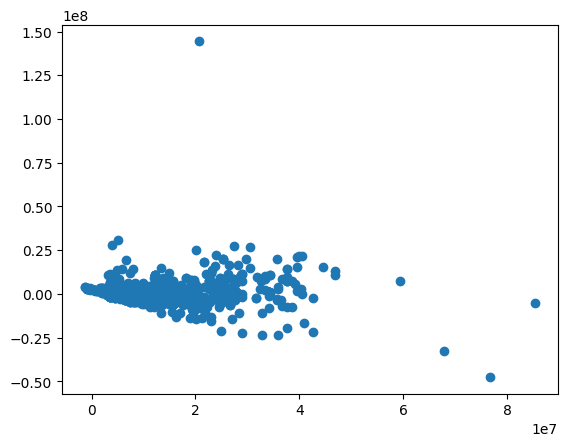

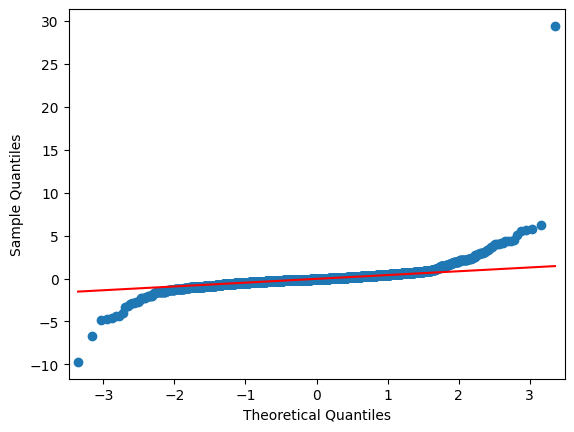

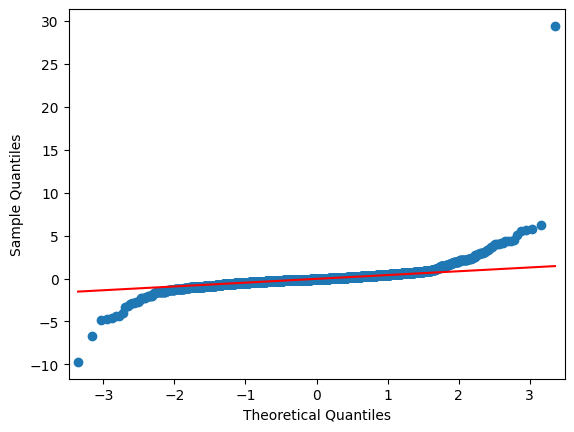

In [38]:
plt.scatter(
    results_regression.fittedvalues,
    results_regression.resid)
plt.show()
sm.qqplot(results_regression.resid_pearson, line = "q")

In [57]:
# build a model that uses all features
exog = data.copy()
exog = sm.add_constant(exog) # adds an intercept column

# Check data types and convert to numeric if necessary
for col in exog.columns:
    if exog[col].dtype == 'object':
        exog[col] = pd.to_numeric(exog[col], errors='coerce')

# Ensure there are no missing values
exog = exog.fillna(0)

exog = pd.get_dummies(exog, drop_first=True) # Converts categorical to one-hot
endog = exog.pop("Price")

In [59]:
model_linear_regression = sm.OLS(
    endog = endog,
    exog = exog)
results_regression = model_linear_regression.fit()
# results_regression.summary() # yields a very large printout
results_regression.params.head(10)

const               -3.938770e+06
Area                 1.053417e+04
Location            -1.080015e-06
No. of Bedrooms     -1.631512e+06
Resale               1.394266e+06
MaintenanceStaff    -1.189055e+06
Gymnasium           -9.275971e+05
SwimmingPool         7.126829e+05
LandscapedGardens    1.045274e+06
JoggingTrack        -3.423838e+05
dtype: float64

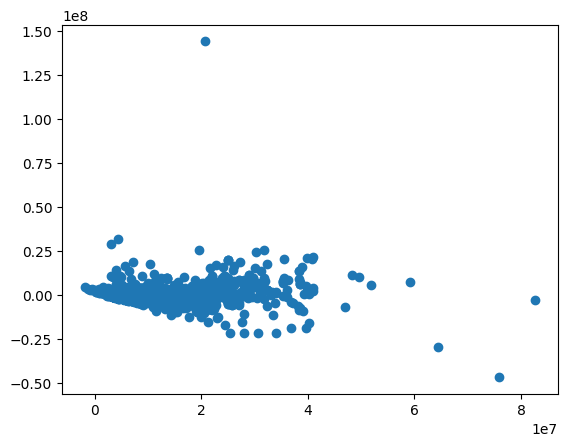

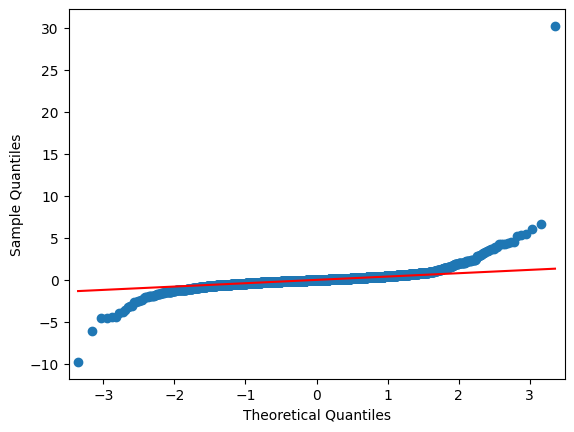

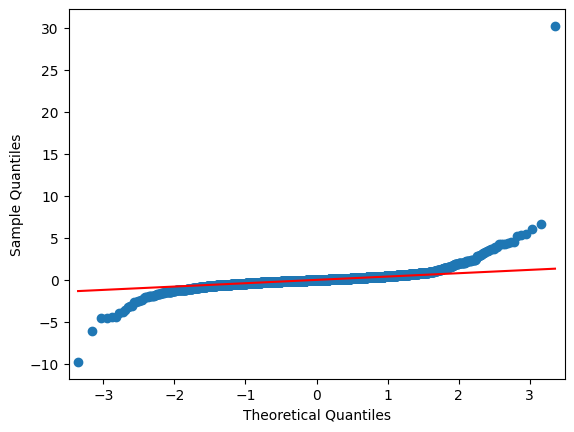

In [55]:
# residual plot for influential obs.
plt.scatter(
    results_regression.fittedvalues,
    results_regression.resid)
plt.show()

# qqplot for normality
sm.qqplot(results_regression.resid_pearson, line = "q")

In [56]:
# prediction on simple model

house = { 'No. of Bedrooms' : 3, 'Area': 1000 }

def predict_linear_regression(fitted_model, dict_features):
    """ 
    Calculates y ~ const + sum( parameter*value )

    { 'feature name' : value }
    
    Does not assume you have all features present, so prediction may be off.
    Assumes const parameter is not present in dictionary
    """
    list_given_terms = [
        fitted_model.params[key]*value for key, value in dict_features.items()
    ]
    constant_value = fitted_model.params['const']
    list_given_terms.append(constant_value)
    
    return sum(list_given_terms)

prediction = predict_linear_regression(results_regression, house)
print("Predicted housing price:", prediction)

Predicted housing price: 1700869.3913483517



- parameters & hyperparameters
  - parameters in regression models
    - weights 
    - bias
  - **hyperparameters**
    - learning rate
    - number of epochs
    - degree of polynomial

rule of thrumb: any values set **before** the training process is a hyperparameter; any quantity that the model creates **during** training process is a parameter. 